# Project Group - 

Members: Yme Tuik, Gijs Meijers, Bart Ligtenberg, Huub Kavelaars

Student numbers: 5026369, 4957822, 5407710, 5085330

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Small logistics firms increasingly consider electrifying their vehicles, but volatile hourly electricity prices make charging costs uncertain, and upfront EV investments are hard to justify without clear savings. This report focuses on when to charge, not just how much, by optimizing depot charging against dynamic prices, ensuring vehicles leave with the required State of Charge. As an optional extension, we assess whether adding rooftop solar meaningfully lowers grid purchases and shortens payback. The outcome is a practical, data-driven guideline for small companies to cut operating costs and make informed steps toward cleaner transport.

**Main research question** \
What charging schedule minimizes the daily energy cost for a small depot-based EV fleet, under dynamic hourly electricity prices, while meeting per-vehicle departure state of charge (SoC) requirements and site/charger constraints?

**Sub-question**\
What is the payback period for a rooftop PV investment, and how does it vary with PV size and electricity price scenarios?


Scope for clarity: 
one depot; 3–6 vehicles; 1 hour time steps; base case = 1 day, with a short week-long robustness check. 

Key outputs: 
 - Total cost [€]
 - Peak grid power [kW]
 - SoC-violation count [target 0]
 - PV payback [years]
 

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Yme Tuik**: Background research on topic and writing of the proposal.

**Gijs Meijers**: Background research on topic and writing of the proposal.

**Bart Ligtenberg**: Background research on topic and writing of the proposal.

**Huub Kavelaars**: Creating GitHub environment, Background research on topic and writing of the proposal

# Data Used

The dataset used in this study is jeroen_punt_nl_dynamische_stroomprijzen_jaar_2024.csv, obtained from jeroen.nl, a platform that provides datasets on average electricity prices over different timespans. The dataset contains the dynamic hourly electricity prices in the Netherlands for the year 2024.

The dataset includes the following columns:

datum_nl – the timestamp in local Dutch time , indicating the exact date and hour of the price.

datum_utc – the corresponding timestamp in Coordinated Universal Time (UTC).

prijs_excl_belastingen – the electricity price in euros per kilowatt-hour (€/kWh), excluding taxes and surcharges.

In total, the dataset covers all 8,760 hours of the year 2024. This is a lot of data which may needs to be filtered out.

# Data Pipeline

**Data Ingestion**\
The dataset is imported into Python using the pandas library.
Development and analysis are carried out in Visual Studio Code within a virtual Python environment to ensure reproducibility.

**Data Cleaning**\
Missing values and inconsistencies (e.g., missing timestamps, negative values) are identified and corrected.
Units are checked and standardized (€/kWh for prices).

**Data Transformation** \
Charging scenarios are defined for further analysis (e.g., charging during daytime, nighttime, or at the cheapest available time).

**Data Storage** \
The dataset is stored as a CSV file to allow reproducibility and incremental analysis.
Version control (Git) is used to track scripts and transformations.

**Data Analysis & Optimization** \
Optimization models are implemented in Python to identify cost-efficient charging schedules, considering dynamic electricity prices.
Constraints such as vehicle fleet size, battery capacity, and departure/arrival times are included.
Several scenarios are simulated and compared in terms of their impact on the payback period of the solar panel investment.

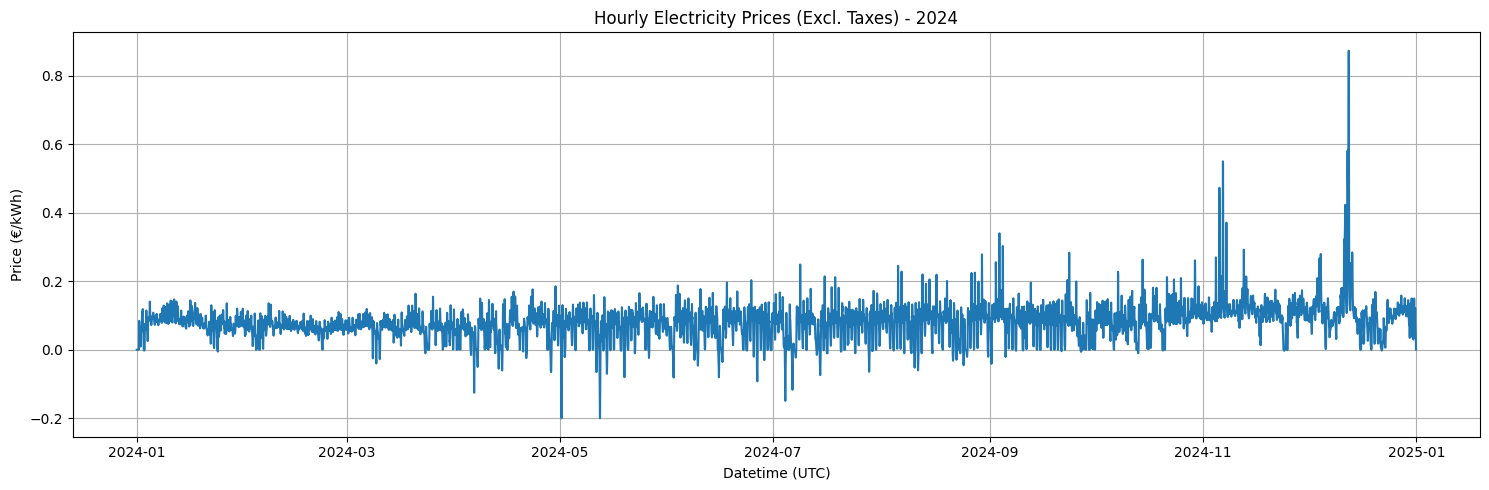

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_hourly_prices(csv_path):
    """
    Reads a CSV file with columns:
    datum_nl ; datum_utc ; prijs_excl_belastingen
    and plots hourly prices for the entire year.
    """
    # Load the CSV
    df = pd.read_csv(csv_path, sep=';', quotechar='"')

    # Parse datetime column
    df['datum_utc'] = pd.to_datetime(df['datum_utc'])

    # Convert price from comma to dot and cast to float
    df['prijs_excl_belastingen'] = (
        df['prijs_excl_belastingen']
        .astype(str)
        .str.replace(',', '.')
        .astype(float)
    )

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(df['datum_utc'], df['prijs_excl_belastingen'])
    plt.title('Hourly Electricity Prices (Excl. Taxes) - 2024')
    plt.xlabel('Datetime (UTC)')
    plt.ylabel('Price (€/kWh)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_hourly_prices("jeroen_punt_nl_dynamische_stroomprijzen_jaar_2024.csv")
